In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

#Número Top de Gens. En aquest cas vull els TOP500
n=500

#Fitxer que contè en CV els gens codifcants de PROTEÏNES més epxressats de manera ordenada decreixent.
teixits = pd.read_csv('D:/TFM/ANALISI_MODELS/Datasets/all_gensCV_noversio_PROTEIN_ZA.csv',sep =",")

In [2]:
#data = teixits.iloc[:, 1:4]
data=teixits

In [3]:
if (n==0 or n>(len(teixits.columns)-3)):
    n=len(teixits.columns)-3
    
data = teixits.iloc[:, 2:n+3]

In [4]:
data

,SMTSD,ENSG00000160882,ENSG00000259384,ENSG00000172023,ENSG00000172179,ENSG00000169248,ENSG00000159723,ENSG00000115386,ENSG00000174576,ENSG00000170498,...,ENSG00000089116,ENSG00000143858,ENSG00000177943,ENSG00000100314,ENSG00000242866,ENSG00000168314,ENSG00000198502,ENSG00000124935,ENSG00000172794,ENSG00000136535
0,Brain - Cortex,0.35630,0.0000,0.00000,0.00000,0.03501,0.30600,0.1653,1.57600,0.2355,...,0.00000,4.872,8.493,3.795,1.3670,399.10,1.909,0.8350,11.320,35.28000
1,Brain - Cerebellum,0.43660,0.2089,0.73670,0.00000,0.21980,0.48040,4.3470,7.05500,2.3660,...,5.85200,54.610,111.600,23.100,11.2100,13.72,1.456,1.3110,167.600,0.02707
2,Brain - Cortex,0.18460,4.2000,1.93800,8.21200,0.68150,0.11610,6.2180,1.06300,0.1667,...,0.00000,2.933,6.916,3.100,1.9740,27.51,3.354,0.5541,10.450,28.46000
3,Brain - Cerebellum,0.09784,15.7600,0.12580,9.01800,0.45040,0.28120,0.8642,4.14200,1.9700,...,4.48300,37.670,101.900,12.080,14.0200,51.17,2.174,0.8952,98.000,0.16640
4,Brain - Cortex,0.01387,6.9020,0.06242,11.84000,0.11180,0.34890,0.6267,3.72300,0.4135,...,0.02617,2.772,6.985,2.330,2.7170,24.46,3.638,0.3332,16.090,30.85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,Brain - Cortex,0.34510,0.0000,1.62900,0.00000,28.63000,0.50800,3.6430,0.37170,0.1369,...,0.00000,2.873,6.050,5.349,1.0940,50.95,1.694,0.9434,15.960,32.08000
2637,Brain - Cerebellum,0.39970,0.7800,1.74600,0.00000,0.00000,0.65050,3.0750,0.36890,2.2940,...,4.51100,53.090,102.300,13.920,11.3700,26.15,6.131,4.2360,93.660,0.05833
2638,Brain - Cortex,0.22160,8.2930,1.51900,11.39000,0.08501,0.58380,5.9720,0.61310,0.1144,...,0.01327,1.740,9.648,1.659,0.9477,10.51,42.350,2.4500,7.784,22.36000
2639,Brain - Cerebellum,0.00000,1.8660,0.00000,0.55470,0.00000,0.42440,0.3344,0.08171,1.4480,...,3.57400,60.900,11.410,10.470,4.9360,2.92,5.791,2.5900,47.770,0.12560


In [5]:
#Creació conjunt train i test

x,y=data.iloc[:, 1:n+1],data.iloc[:, 0]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

x_train = np.log2(x_train+1)
x_test = np.log2(x_test+1)

In [6]:
#Definim PCA

pca = PCA()

z= pca.fit_transform(x_train)

x_train_pca = z
x_test_pca  = pca.transform(x_test)

66 components expliquen un 95% de la variança. De 500 dimensions a 66


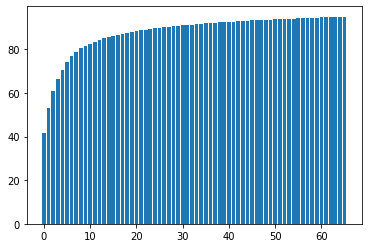

In [7]:
total = sum(pca.explained_variance_)

k = 0
current_variance = 0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " components expliquen un 95% de la variança. De ",n," dimensions a ", k, sep='')

pca = PCA(n_components=k)

x_train.pca = pca.fit(x_train)
x_train_pca = pca.transform(x_train)

x_test_pca = pca.transform(x_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [8]:
#Dinàmicament agafo el numero de Dimensions de PCA: k

principalDf = pd.DataFrame(data = x_train_pca[:,0:k])
             #, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,-6.133467,-4.801439,-4.620853,2.720122,-2.353539,0.297801,-3.369896,2.387212,10.621464,-0.875751,...,0.847259,0.700846,0.997376,0.398598,-0.621150,0.180922,0.358842,-0.168989,0.369530,-0.432685
1,46.497047,-1.678958,1.593111,-1.044688,-1.838154,0.065233,0.070177,-0.790346,0.910937,1.315104,...,-0.290977,0.255476,0.011964,-1.140673,-0.519162,0.581045,-0.726065,-0.334820,0.791305,-0.627561
2,-10.791015,5.632751,-7.690617,1.780846,7.822065,5.411483,8.840901,-3.088826,-1.965227,-5.610800,...,0.189965,-2.110797,2.981588,-0.746065,-0.037715,1.474382,0.169665,0.518624,0.144260,1.352176
3,-9.369286,-14.704342,-10.312480,-6.087860,-10.028821,-0.908572,3.755413,1.557388,-2.351157,-1.357158,...,-0.638732,0.420496,-0.202149,-0.406533,0.363823,0.261666,-0.244568,-0.164080,-0.163316,0.107429
4,-7.623864,-12.978953,-8.650012,0.258570,-3.280490,1.402235,1.441391,-0.776926,-0.784992,1.581654,...,0.666037,0.807664,-0.204946,-0.758488,-0.927503,-0.894420,-0.668835,0.141495,0.100846,0.145311


In [9]:
x_train_pca[:,0:11].shape

(2112, 11)

In [10]:
principalDf.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

finalDF = pd.concat([principalDf, y_train], axis=1)

finalDF.head(5)

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,SMTSD
0,-6.133467,-4.801439,-4.620853,2.720122,-2.353539,0.297801,-3.369896,2.387212,10.621464,-0.875751,...,0.700846,0.997376,0.398598,-0.621150,0.180922,0.358842,-0.168989,0.369530,-0.432685,Brain - Hippocampus
1,46.497047,-1.678958,1.593111,-1.044688,-1.838154,0.065233,0.070177,-0.790346,0.910937,1.315104,...,0.255476,0.011964,-1.140673,-0.519162,0.581045,-0.726065,-0.334820,0.791305,-0.627561,Brain - Cerebellum
2,-10.791015,5.632751,-7.690617,1.780846,7.822065,5.411483,8.840901,-3.088826,-1.965227,-5.610800,...,-2.110797,2.981588,-0.746065,-0.037715,1.474382,0.169665,0.518624,0.144260,1.352176,Brain - Frontal Cortex (BA9)
3,-9.369286,-14.704342,-10.312480,-6.087860,-10.028821,-0.908572,3.755413,1.557388,-2.351157,-1.357158,...,0.420496,-0.202149,-0.406533,0.363823,0.261666,-0.244568,-0.164080,-0.163316,0.107429,Brain - Nucleus accumbens (basal ganglia)
4,-7.623864,-12.978953,-8.650012,0.258570,-3.280490,1.402235,1.441391,-0.776926,-0.784992,1.581654,...,0.807664,-0.204946,-0.758488,-0.927503,-0.894420,-0.668835,0.141495,0.100846,0.145311,Brain - Frontal Cortex (BA9)


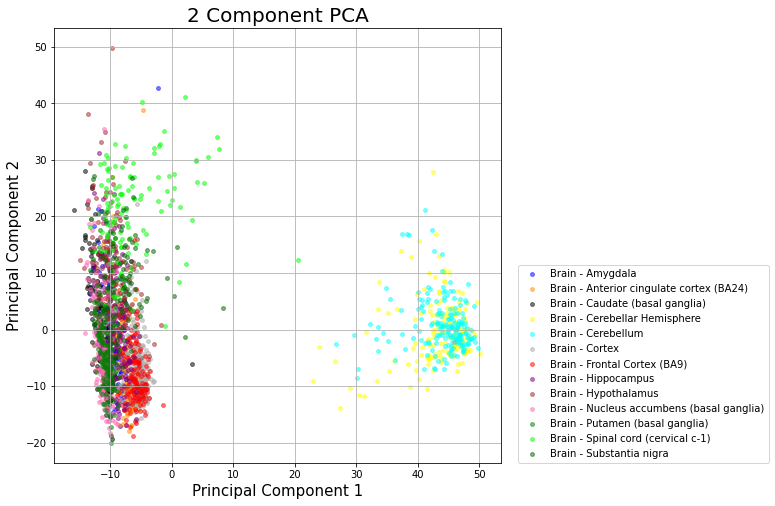

In [11]:
#Visualitzo la projecció 2D

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 1]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

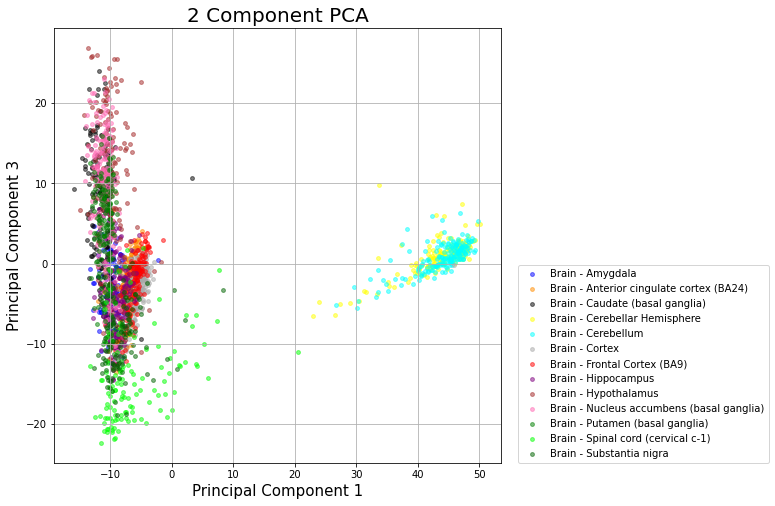

In [12]:

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 2]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

<b>tSNE Perplexity 30</b>

In [13]:
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1, random_state=1234)

points = tsne.fit_transform(x_train)

tsne_df = pd.DataFrame({'X':points[:,0],
                        'Y':points[:,1],
                        'Tipus Teixit':y_train})
tsne_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2112 samples in 0.002s...
[t-SNE] Computed neighbors for 2112 samples in 0.321s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2112
[t-SNE] Computed conditional probabilities for sample 2000 / 2112
[t-SNE] Computed conditional probabilities for sample 2112 / 2112
[t-SNE] Mean sigma: 5.357293
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.814644
[t-SNE] KL divergence after 1000 iterations: 1.073285


,X,Y,Tipus Teixit
0,-16.021463,2.829370,Brain - Hippocampus
1,63.271992,-8.224571,Brain - Cerebellum
2,-23.393391,-13.111759,Brain - Frontal Cortex (BA9)
3,9.365378,5.984059,Brain - Nucleus accumbens (basal ganglia)
4,0.555507,-10.410977,Brain - Frontal Cortex (BA9)


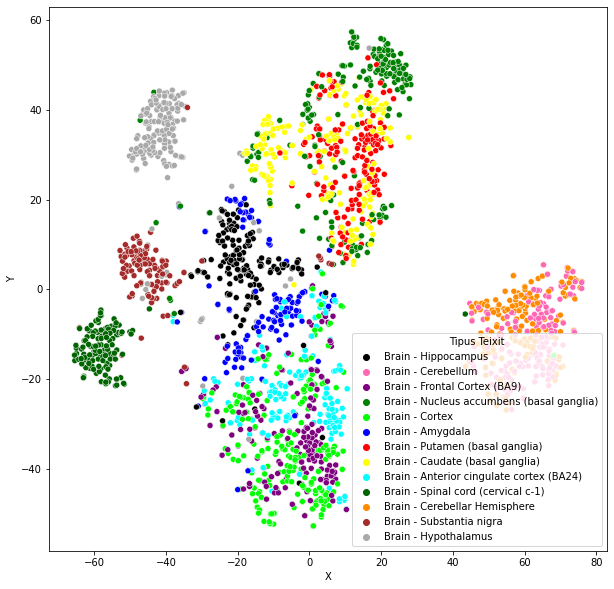

In [14]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x="X", y="Y",
              hue="Tipus Teixit",
              palette=["black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"],
              #legend='full',              
              data=tsne_df);

<b>Realització de Models</b>

<b>Model Classificador kNN</b>

In [15]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={"n_neighbors":range(5,25), "weights": ["uniform","distance"]}


# Validació creuada
# ==============================================================================
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()


grid = GridSearchCV(model , param_grid = param_grid,
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,                           
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(kNN) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model2 = grid.best_estimator_

r_model2 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions2 = model2.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy2 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions2,
            normalize = True
           )
print("")
print(f"(kNN) El accuracy de test és: {100*accuracy2}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions2,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 40 candidates, totalling 400 fits
39 # Prec. mitjana:  77.70142180094787  desv.:  3.1333430665527207  paràmetres:  {'n_neighbors': 5, 'weights': 'uniform'}
40 # Prec. mitjana:  77.60596441026559  desv.:  2.2020464002238325  paràmetres:  {'n_neighbors': 5, 'weights': 'distance'}
38 # Prec. mitjana:  77.8905481534472  desv.:  2.3165659992127163  paràmetres:  {'n_neighbors': 6, 'weights': 'uniform'}
37 # Prec. mitjana:  78.03250469462577  desv.:  2.8137450804744777  paràmetres:  {'n_neighbors': 6, 'weights': 'distance'}
34 # Prec. mitjana:  78.93096664580166  desv.:  2.4726088594433517  paràmetres:  {'n_neighbors': 7, 'weights': 'uniform'}
32 # Prec. mitjana:  78.93096664580167  desv.:  1.7490158256489197  paràmetres:  {'n_neighbors': 7, 'weights': 'distance'}
32 # Prec. mitjana:  78.93096664580167  desv.:  1.6701858081232133  paràmetres:  {'n_neighbors': 8, 'weights': 'uniform'}
23 # Prec. mitjana:  79.40422963426631  desv.:  1.9242640792615422  paràmetres:  

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,29,1,0,0,0,0,1,1,0,0,2,0,0
Brain - Anterior cingulate cortex (BA24),0,21,0,0,0,3,4,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,40,0,0,0,1,0,0,2,9,0,0
Brain - Cerebellar Hemisphere,0,0,0,41,10,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,7,48,0,0,0,0,0,0,0,0
Brain - Cortex,0,1,0,0,1,38,2,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),2,0,0,0,0,7,24,0,0,0,0,0,0
Brain - Hippocampus,4,3,1,0,0,1,0,29,0,0,0,2,1
Brain - Hypothalamus,0,0,0,0,1,0,0,1,35,1,0,0,1


<b>SVM</b>

In [16]:
#Emprant Reducció PCA
#============================
# Grid d'hiperparàmetres
# ==============================================================================
param_grid = {"C": (0.01, 0.1, 1, 10, 100, 150, 200, 250 , 300, 1000), "gamma": (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.005, 0.1,0.5, 1, 10)}

# Validació creuada
# ==============================================================================
from sklearn import svm

model = svm.SVC()
grid = GridSearchCV(model, param_grid = param_grid,                           
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)

    
# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(SVM) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model3 = grid.best_estimator_

r_model3 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions3 = model3.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy3 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions3,
            normalize = True
           )
print("")
print(f"(SVM) El accuracy de test és: {100*accuracy3}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions3,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
61 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-06}
61 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-05}
61 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.0001}
52 # Prec. mitjana:  23.910846821067693  desv.:  0.9953900068756947  paràmetres:  {'C': 0.01, 'gamma': 0.001}
61 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.01}
60 # Prec. mitjana:  10.179960654564965  desv.:  0.31833916058667777  paràmetres:  {'C': 0.01, 'gamma': 0.005}
61 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.1}
61 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.5}
61 # Prec. mitjana:  10.038004113386389  desv.:  0.1

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,32,0,0,0,0,0,1,1,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),0,26,0,0,0,0,2,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,1,49,0,0,0,0,0,0,1,1,0,0
Brain - Cerebellar Hemisphere,0,0,0,47,4,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,0,55,0,0,0,0,0,0,0,0
Brain - Cortex,0,1,0,1,0,38,2,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,0,0,0,0,3,30,0,0,0,0,0,0
Brain - Hippocampus,1,4,0,0,0,0,1,34,0,1,0,0,0
Brain - Hypothalamus,0,0,0,1,0,0,0,0,37,1,0,0,0


<b>Arbres de decisió</b>

In [17]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'min_samples_split' :(2, 10, 20, 50 ,75,100,500,1000),'max_depth':(4,5,6,7,8,9,10,20,50,100,200,300,400,450,460,470,500,550,600,650,700,1000)}

# Validació creuada
# ==============================================================================
import sklearn.tree

model=sklearn.tree.DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Arbre de Decissió) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model4 = grid.best_estimator_

r_model4 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions4 = model4.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy4 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions4,
            normalize = True
           )
print("")
print(f"(Arbre de Decissió) El accuracy de test és: {100*accuracy4}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions4,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 176 candidates, totalling 1760 fits
127 # Prec. mitjana:  53.12349101314495  desv.:  1.5838658126385579  paràmetres:  {'max_depth': 4, 'min_samples_split': 2}
127 # Prec. mitjana:  53.12349101314495  desv.:  1.5838658126385579  paràmetres:  {'max_depth': 4, 'min_samples_split': 10}
127 # Prec. mitjana:  53.12349101314495  desv.:  1.5838658126385579  paràmetres:  {'max_depth': 4, 'min_samples_split': 20}
132 # Prec. mitjana:  52.839354377179646  desv.:  1.6297957897276887  paràmetres:  {'max_depth': 4, 'min_samples_split': 50}
130 # Prec. mitjana:  52.88697129571671  desv.:  1.5813706305362631  paràmetres:  {'max_depth': 4, 'min_samples_split': 75}
130 # Prec. mitjana:  52.88697129571671  desv.:  1.5813706305362631  paràmetres:  {'max_depth': 4, 'min_samples_split': 100}
154 # Prec. mitjana:  41.99678082804256  desv.:  1.7391117271720757  paràmetres:  {'max_depth': 4, 'min_samples_split': 500}
155 # Prec. mitjana:  27.888312617365642  desv.:  0.8853022078427

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,27,0,0,0,0,0,0,5,0,0,1,0,1
Brain - Anterior cingulate cortex (BA24),2,17,0,0,0,1,2,5,1,0,0,0,0
Brain - Caudate (basal ganglia),0,0,31,0,0,0,0,1,0,5,15,0,0
Brain - Cerebellar Hemisphere,0,0,0,39,12,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,13,42,0,0,0,0,0,0,0,0
Brain - Cortex,3,2,0,1,0,25,11,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,2,0,0,0,7,20,0,0,0,0,4,0
Brain - Hippocampus,4,2,1,0,0,0,2,30,2,0,0,0,0
Brain - Hypothalamus,1,1,1,1,0,0,1,2,31,1,0,0,0


<b>Random Forest</b>

In [18]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'n_estimators' :(10, 50 ,100 ,200, 250, 400),'max_depth':(6,7,8,9,10,11,12,15,20,25,30)}

# Validació creuada
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Random Forest) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model5 = grid.best_estimator_

r_model5 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions5 = model5.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy5 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions5,
            normalize = True
           )
print("")
print(f"(Random Forest) El accuracy de test és: {100*accuracy5}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions5,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 66 candidates, totalling 660 fits
65 # Prec. mitjana:  74.28954663328267  desv.:  2.8449446227178234  paràmetres:  {'max_depth': 6, 'n_estimators': 10}
55 # Prec. mitjana:  80.35321470088527  desv.:  2.111669964030268  paràmetres:  {'max_depth': 6, 'n_estimators': 50}
54 # Prec. mitjana:  80.72967897701868  desv.:  1.5919616441010678  paràmetres:  {'max_depth': 6, 'n_estimators': 100}
53 # Prec. mitjana:  82.19753196816598  desv.:  1.4166467795013575  paràmetres:  {'max_depth': 6, 'n_estimators': 200}
51 # Prec. mitjana:  82.38688187427347  desv.:  1.0020499911527463  paràmetres:  {'max_depth': 6, 'n_estimators': 250}
52 # Prec. mitjana:  82.24492533309488  desv.:  0.7549553300442956  paràmetres:  {'max_depth': 6, 'n_estimators': 400}
66 # Prec. mitjana:  73.81673075203435  desv.:  2.0696515410024237  paràmetres:  {'max_depth': 7, 'n_estimators': 10}
50 # Prec. mitjana:  82.57869087007063  desv.:  2.1412464649677077  paràmetres:  {'max_depth': 7, 'n_estimat

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,32,0,0,0,0,0,0,0,1,0,1,0,0
Brain - Anterior cingulate cortex (BA24),1,25,0,0,0,1,1,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,48,0,0,0,1,0,0,1,2,0,0
Brain - Cerebellar Hemisphere,0,0,0,41,10,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,1,54,0,0,0,0,0,0,0,0
Brain - Cortex,0,1,0,0,1,37,3,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,1,0,0,0,6,25,0,0,0,0,1,0
Brain - Hippocampus,2,3,0,0,0,0,1,34,0,1,0,0,0
Brain - Hypothalamus,0,0,0,1,0,0,0,1,36,1,0,0,0


In [19]:
print("##################################################")
print(f"Model kNN Accuracy: {100*r_model2:.2f}%")
print(f"Model kNN, Accuracy de test és: {100*accuracy2:.2f}%")
print("##################################################")
print(f"Model Svm Accuracy: {100*r_model3:.2f}%")
print(f"Model Svm, Accuracy de test és: {100*accuracy3:.2f}%")
print("##################################################")
print(f"Model Arbre de Decisió: {100*r_model4:.2f}%")
print(f"Model Arbre de Decisió, Accuracy de test és: {100*accuracy4:.2f}%")
print("##################################################")
print(f"Model Random Forest: {100*r_model5:.2f}%")
print(f"Model Random Forest, Accuracy de test és: {100*accuracy5:.2f}%")


##################################################
Model kNN Accuracy: 80.59%
Model kNN, Accuracy de test és: 82.99%
##################################################
Model Svm Accuracy: 92.00%
Model Svm, Accuracy de test és: 93.38%
##################################################
Model Arbre de Decisió: 70.08%
Model Arbre de Decisió, Accuracy de test és: 72.59%
##################################################
Model Random Forest: 86.46%
Model Random Forest, Accuracy de test és: 89.60%
